In [168]:
import pandas as pd

In [170]:
dataset = pd.read_csv("Startups_Profits.csv")
#dataset

In [172]:
dataset=pd.get_dummies(dataset,drop_first=True)
#dataset

In [174]:
#dataset.columns

In [238]:
independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida', 'State_New York']]
#independent

In [282]:
dependent=dataset[['Profit']]
#dependent

In [368]:
from sklearn.model_selection import train_test_split

In [370]:
X_train, X_test, y_train, y_test = train_test_split(independent,dependent, test_size=0.30, random_state=0)

In [538]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='absolute_error', splitter='best', max_features='log2')

In [540]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_features='log2')

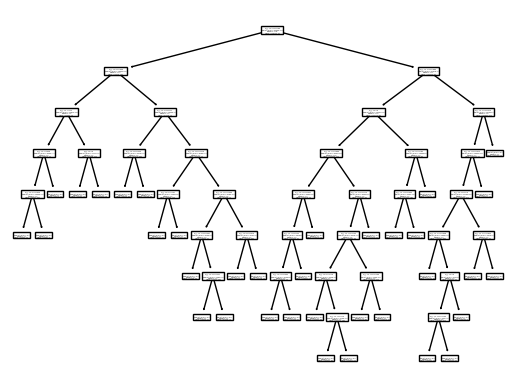

In [542]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [543]:
y_pred=regressor.predict(X_test)

In [544]:
y_pred

array([132602.65, 134307.35, 141585.52,  78239.91, 182901.99, 118474.03,
        78239.91,  99937.59, 108733.99, 155752.6 ,  90708.19,  89949.14,
       132602.65,  90708.19, 108733.99])

In [545]:
from sklearn.metrics import r2_score

In [546]:
r_score=r2_score(y_test, y_pred)
r_score

0.8319971156000496

In [552]:
import pickle

In [17]:
filename="DT_finalized_model.sav"

In [35]:
pickle.dump(regressor, open(filename, 'wb'))
loaded_model=pickle.load(open("DT_finalized_model.sav", 'rb'))

In [90]:
result=loaded_model.predict([[24234,68788,12333,1,0]])
print(result)

[69758.98]


C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [100]:
predication_input_RnD_Spend=int(input("Enter the Prediction R&D Spend value"))
predication_input_Administration=int(input("Enter the Prediction Administration value"))
predication_input_Marketing_Spend=int(input("Enter the Prediction Marketing Spend value"))
predication_input_State_Florida=int(input("Enter the Prediction State_Florida value"))
predication_input_State_NewYork=int(input("Enter the Prediction State_NewYork value"))
Future_Preditcion = regressor.predict([[predication_input_RnD_Spend, predication_input_Administration, predication_input_Marketing_Spend, predication_input_State_Florida, predication_input_State_NewYork]])
print("Future Prediction={}".format(Future_Preditcion))

Enter the Prediction R&D Spend value 234324
Enter the Prediction Administration value 432423
Enter the Prediction Marketing Spend value 24324
Enter the Prediction State_Florida value 1
Enter the Prediction State_NewYork value 0


Future Prediction=[191792.06]


C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
